<h1 align=center>Proyecto: Titanic - Machine Learning from Disaster</h1>
<hr>

<h2 align=center>Análisis Exploratorio de Datos (EDA)</h2>

**Importamos librerias**

In [8]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**1.-Extracción de los datos**

Lo primero que hacemos es leer los archivos csv con una estructura de dataframe de pandas.

In [9]:
data_train = pd.read_csv("../datasets/train.csv",index_col= "PassengerId" )
data_test = pd.read_csv("../datasets/test.csv",index_col= "PassengerId")

**2.-Examen preliminar.**

Revisamos que los dataframes contengan los datos con un head y hacemos un analisis preliminar de los mismos (tamaño, cantidad de datos, columnas, valores faltantes y tipo de datos. 

In [10]:
data_train.head()
#data_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Apreciamos que contiene 891 filas, once columnas 6 numericas y 5 que no y por lo tanto deberan ser adaptadas a fin de poder servir para entrenar los modelos de ML. Vemos tambien que hay datos nulos en Age y en Cabin.

<AxesSubplot: ylabel='PassengerId'>

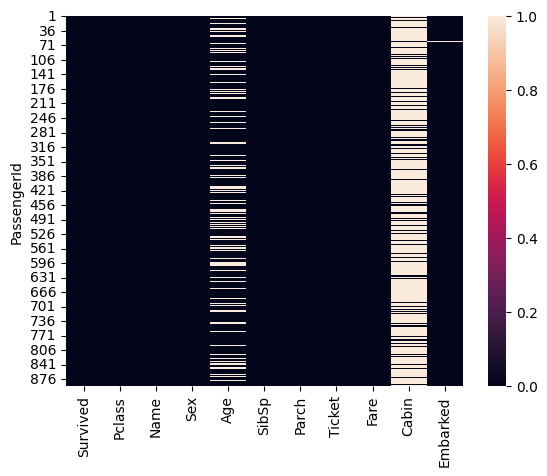

In [12]:
sns.heatmap(data_train.isnull())

Analizamos individualmente algunas columnas para ver la variedad y cantidad de dato que las integran. Esto si bien es un poco tedioso resulta útil a la hora de determinar que procesos aplicar (no es lo mismo aplicar onehotencoder a una columna con tres tipos de datos que con treinta) y para detectar si hay errores en la carga (ejemplo que en nombre veamos datos de genero).

In [13]:
data_train['Survived'].unique()

array([0, 1], dtype=int64)

In [14]:
data_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
data_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
data_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
data_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [18]:
data_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
data_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [20]:
data_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [21]:
data_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Procedemos a ver si los datos de la columna a predecir esta balanceada.

In [23]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

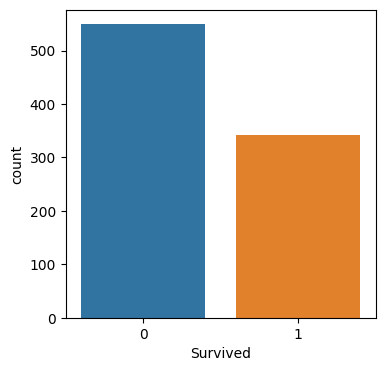

In [24]:
plt.figure(figsize = (4,4))
sns.countplot(x="Survived",data= data_train)

**3.-Procesamiento de los datos.**
Ahora vamos a procesar los valores a fin de poder ver las correlaciones existentes en nuestra bases de datos. No es la forma definitiva que se le dara a los datos, sino que se ultiliza para un examen preliminar y exploratorio de los datos y sus correlaciones.

In [25]:
bins= [0,10,20,30,40,50,60,100]
names = ['0','1','2','3','4','5','6']


In [26]:
data_train['Age'] = pd.cut(data_train['Age'], bins, labels=names) 

In [27]:
le = LabelEncoder()
def preproces(x):
    le.fit(x)
        
    return le.transform(x)

In [28]:
data_train['Sex'] =preproces(data_train['Sex'])
data_train['Embarked'] =preproces(data_train['Embarked'])
data_train['Cabin'] =preproces(data_train['Cabin'])
data_train['Ticket'] =preproces(data_train['Ticket'])
data_train = pd.concat([data_train ,pd.get_dummies(data_train['Age'])], axis=1 )

In [29]:
data_train.corr()


C:\Users\guill\AppData\Local\Temp\ipykernel_9820\3992740103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3,4,5,6
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.120075,-0.000973,-0.022586,0.057867,-0.000079,0.009569,-0.051224
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.110523,0.102180,0.055285,-0.119900,-0.152566,-0.208905,-0.136667
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.076844,-0.038347,0.000295,-0.002330,-0.005509,0.008883,0.071958
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.333369,0.023855,-0.107723,-0.061964,-0.044756,-0.043083,-0.055819
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.359225,0.004640,-0.104314,0.006810,0.019734,-0.019898,-0.021502
Ticket,-0.164549,0.319869,0.059372,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.007452,0.001754,0.021610,0.012508,-0.005727,-0.118667,-0.015047
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,-0.009913,-0.020732,-0.046291,0.095097,0.058960,0.056295,0.029368
Cabin,-0.254888,0.684121,0.096681,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.193205,0.082382,0.029606,0.079415,-0.093444,-0.082442,-0.139180,-0.133657
Embarked,-0.163517,0.157112,0.104057,0.066654,0.038322,-0.006041,-0.221226,0.193205,1.000000,0.041189,0.004416,0.052000,0.057807,0.027148,-0.037535,0.028683
0,0.120075,0.110523,-0.076844,0.333369,0.359225,0.007452,-0.009913,0.082382,0.041189,1.000000,-0.107092,-0.164097,-0.127663,-0.090926,-0.061874,-0.044263


C:\Users\guill\AppData\Local\Temp\ipykernel_9820\1207868684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_train.corr()


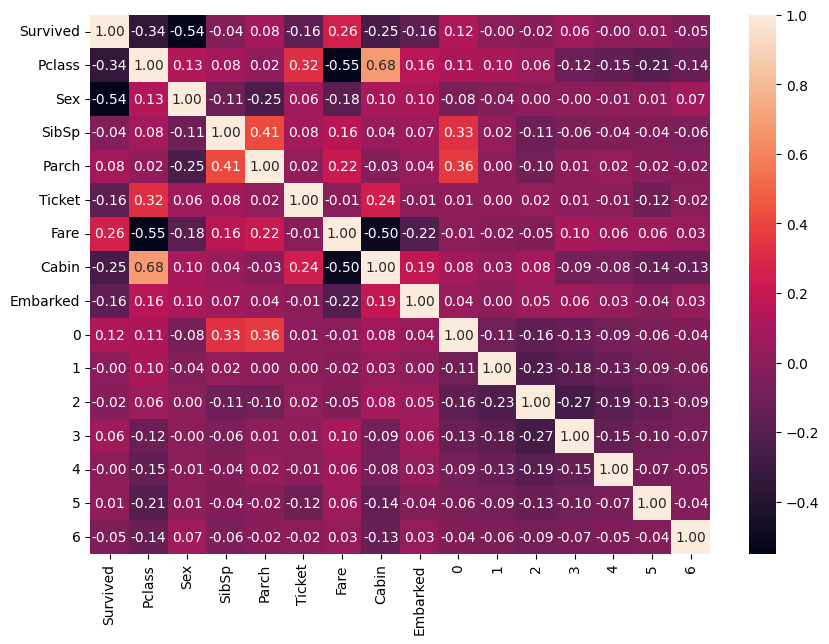

In [30]:
correlation = data_train.corr() 
plt.figure(figsize = (10,7))
sns.heatmap(correlation,cbar = True,    annot=True, fmt= '.2f')
y = data_train['Survived']

Existe una fuerte correlación con el genero de los pasajeros y en segundo lugar con la clase. Despues encontramos correlaciones con la cabina y la tarifa, que además se relacionan entre ellas y con la clase. Por último en menor medida con el ticket, el embarque y la edad en caso de que fuera menor a diez años.